Sentiment Analysis

Create a model that analyzes customer reviews or social media posts to determine the sentiment (positive, negative, neutral). This project can help you understand text classification and the use of libraries like NLTK or TextBlob

Textblob

TextBlob is an open-source Python library that is very easy to use for processing text data. It offers many built-in methods for common natural language processing tasks. Some of the tasks where I prefer to use it over other Python libraries are spelling correction, part of speech tagging, and text classification. But it can be used for various NLP tasks like:

Noun phrase extraction,
Part of speech tagging,
Sentiment Analysis,
Text Classification,
Tokenization,
Word and phrase frequencies,
Parsing,
n-grams,
Word inflexion,
Spelling Correction.

In [4]:
import textblob

In [7]:
from textblob import TextBlob

In [8]:
text = TextBlob("I am Kulasekarapandian, aspiring AIML student. Pusing my skill upward learning daily about ML and DL. Leveling up my skills upward over the limit.")

In [9]:
print(text.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [10]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SEC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
text = TextBlob("The Longest Journey is always starts with a Single step.")

In [24]:
print(text.sentiment)

Sentiment(polarity=-0.07142857142857142, subjectivity=0.21428571428571427)


In [25]:
print(text.correct())

The Longest Journey is always starts with a Single step.


In [26]:
def analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [27]:
reviews = ["I love this product! It's fantastic!",
    "This is the worst service I have ever experienced.",
    "It's okay, neither good nor bad."]

In [28]:
for review in reviews:
    sentiment = analysis(review)
    print(f"Review: {review}\nSentiment Polarity: {sentiment}\n")

Review: I love this product! It's fantastic!
Sentiment Polarity: 0.5625

Review: This is the worst service I have ever experienced.
Sentiment Polarity: -0.09999999999999998

Review: It's okay, neither good nor bad.
Sentiment Polarity: 0.1666666666666667



In [32]:
import os
import nltk.corpus

In [33]:
print(os.listdir(nltk.data.find('corpora')))

['brown', 'brown.zip', 'conll2000', 'conll2000.zip', 'movie_reviews', 'movie_reviews.zip', 'wordnet.zip']


In [34]:
from nltk.corpus import brown

In [35]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

SENTIMENT ANALYSIS

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
import pickle
import re

from nltk.stem import porter
nltk.download('stopwords')
from nltk.corpus import stopwords 
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from wordcloud import WordCloud
from xgboost import XGBClassifier



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SEC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
data = pd.read_csv(r"Data/amazon_alexa.tsv", delimiter= "\t", quoting=3)
print(f"Dataset Shape : {data.shape}")

Dataset Shape : (3150, 5)


In [46]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [47]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [48]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [49]:
data.duplicated().sum()

np.int64(715)

In [51]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [52]:
data.dropna(inplace=True)

In [53]:
data.shape

(3149, 5)

In [54]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [55]:
data['length'] = data['verified_reviews'].apply(len)

In [56]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [66]:
data.rename(columns={'verified_reviews':'reviews'}, inplace=True)

In [70]:
data.head(11)

,rating,date,variation,reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1,367
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1,116


In [73]:
print(data.iloc[10]['reviews'])
print(len(data.iloc[10]['reviews']))
print(data.iloc[10]['length'])

"I sent it to my 85 year old Dad, and he talks to it constantly."
65
65


In [74]:
data.dtypes

rating        int64
date         object
variation    object
reviews      object
feedback      int64
length        int64
dtype: object

In [76]:
len(data)

3149

In [75]:
print(data['rating'].value_counts())

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


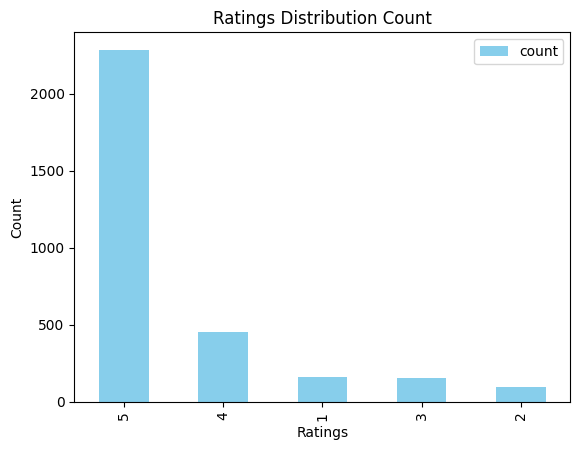

In [78]:
data['rating'].value_counts().plot.bar(color='skyblue')
plt.title("Ratings Distribution Count")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.legend()
plt.show()

In [80]:
print(round(data["rating"].value_counts()/data.shape[0]*100,3))

rating
5    72.594
4    14.449
1     5.113
3     4.827
2     3.017
Name: count, dtype: float64


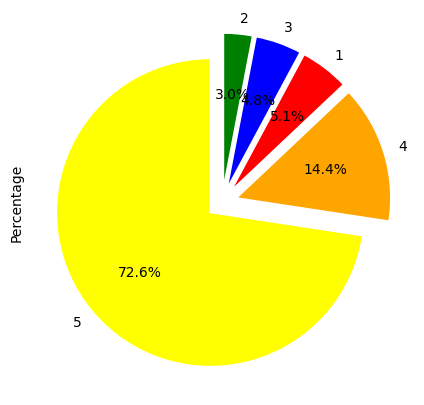

In [83]:
fig = plt.figure(figsize=(5,5))

colors = {'red', 'yellow', 'blue', 'green', 'orange'}

wp = {'linewidth':1, 'edgecolor':'white'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=False, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage')

from io import BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [84]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [88]:
rev0 = data[data['feedback'] == 0].iloc[1]['reviews']
print(rev0)

Sound is terrible if u want good music too get a bose


In [87]:
rev1 = data[data['feedback'] == 1].iloc[1]['reviews']
print(rev1)

Loved it!


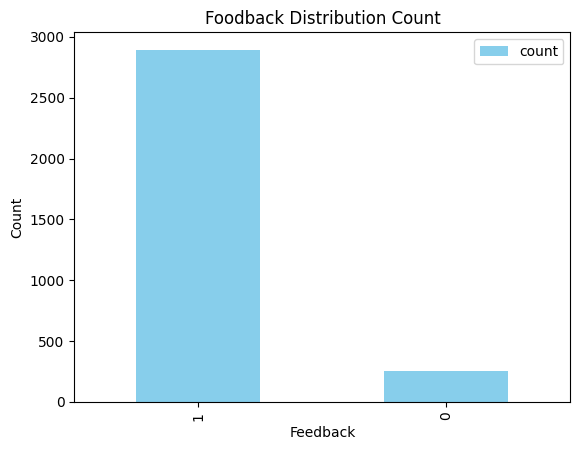

In [89]:
data['feedback'].value_counts().plot.bar(color = 'skyblue')
plt.title("Foodback Distribution Count")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.legend()
plt.show()

In [91]:
print(round(data['feedback'].value_counts()/data.shape[0]*100,2))

feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='percentage'>

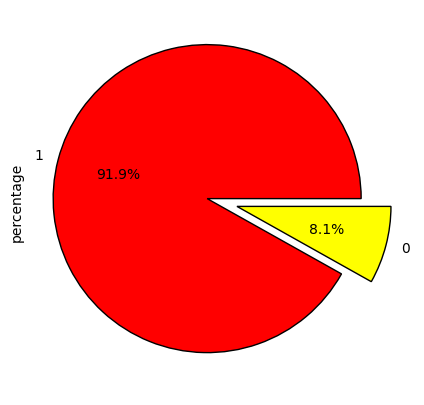

In [96]:
fig = plt.figure(figsize=(5,5))

colors = ("red", "yellow")

wp = {"linewidth":1, "edgecolor":"black"}

tags = data["feedback"].value_counts()/data.shape[0]

explode = (0.1, 0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=False, colors=colors, wedgeprops=wp, explode=explode, label='percentage')

In [97]:
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [98]:
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [99]:
print(data['variation'].value_counts())

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


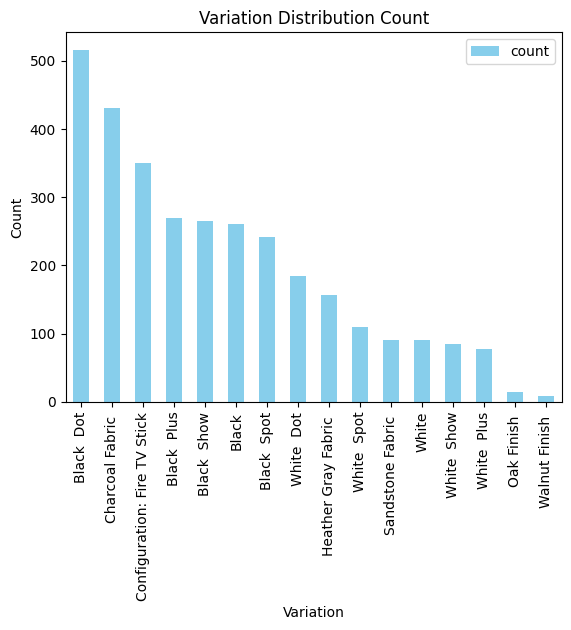

In [100]:
data["variation"].value_counts().plot.bar(color='skyblue')
plt.title("Variation Distribution Count")
plt.xlabel("Variation")
plt.ylabel("Count")
plt.legend()
plt.show()

In [101]:
print(round(data['variation'].value_counts()/data.shape[0]*100,2))

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [102]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

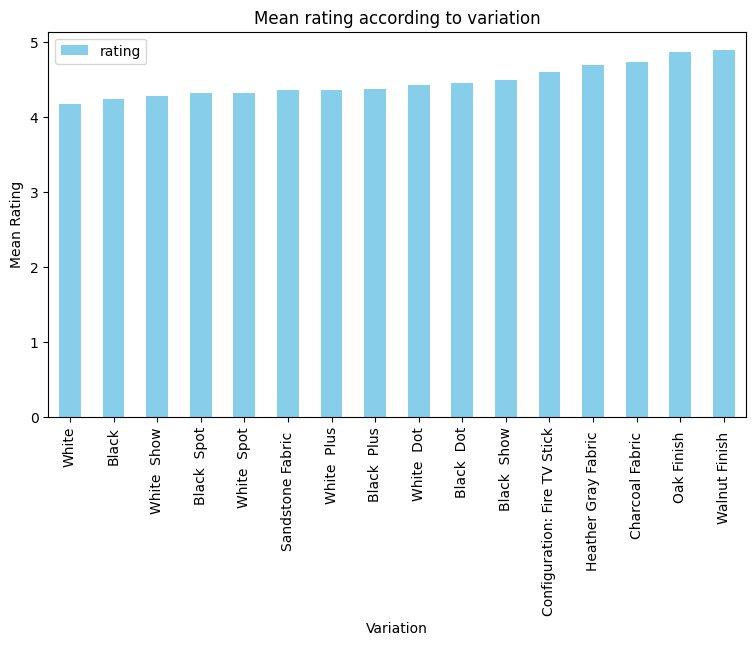

In [104]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color="skyblue", figsize=(9,5))
plt.title("Mean rating according to variation")
plt.xlabel("Variation")
plt.ylabel("Mean Rating")
plt.legend()
plt.show()

In [105]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of Length of review')]

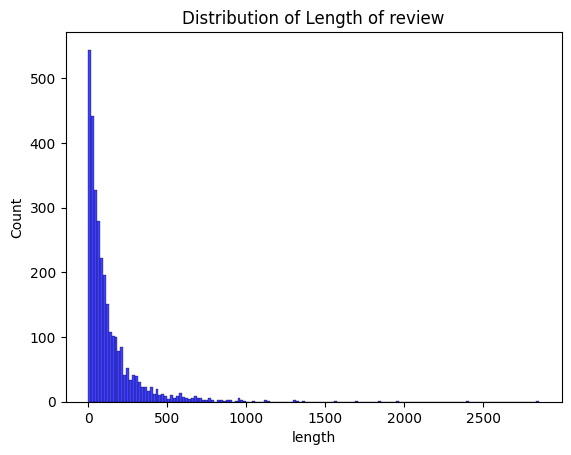

In [107]:
sns.histplot(data['length'], color='blue').set(title="Distribution of Length of review")

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

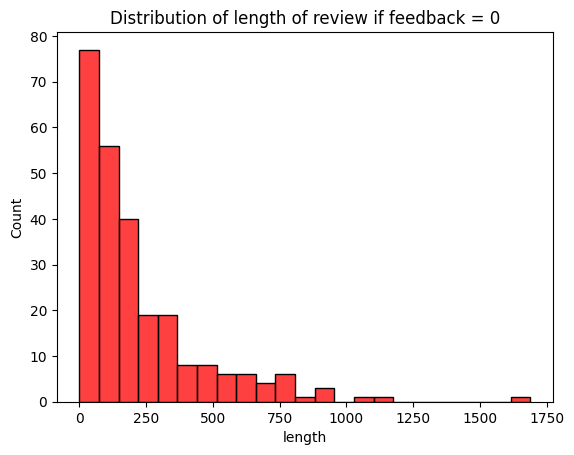

In [108]:
sns.histplot(data[data['feedback']==0]['length'], color="red").set(title="Distribution of length of review if feedback = 0")

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

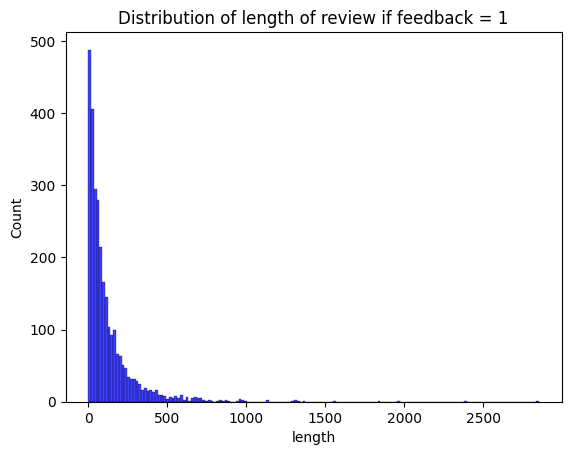

In [110]:
sns.histplot(data[data['feedback']==1]['length'], color="blue").set(title="Distribution of length of review if feedback = 1")

<Axes: ylabel='Frequency'>

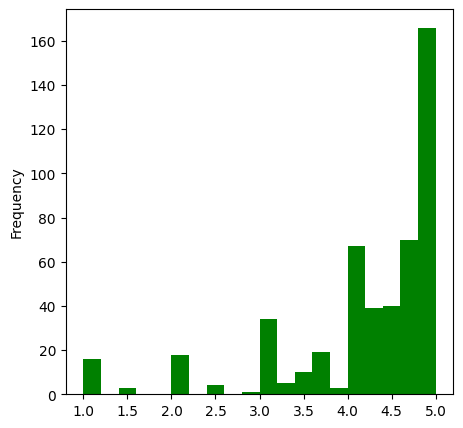

In [112]:
data.groupby('length')['rating'].mean().plot.hist(color='green', figsize=(5,5), bins=20)

In [113]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.reviews)

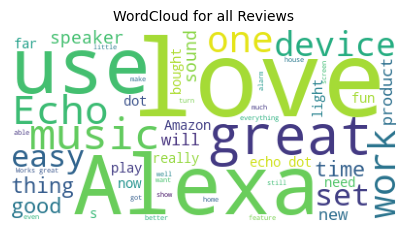

In [114]:
reviews = " ".join([review for review in data["reviews"]])

wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(5,5))
plt.imshow(wc.generate(reviews))
plt.title("WordCloud for all Reviews", fontsize=10)
plt.axis("off")
plt.show()

In [122]:
neg = " ".join([review for review in data[data['feedback'] == 0]['reviews']])
neg = neg.lower().split()

pos = " ".join([review for review in data[data['feedback'] == 1]['reviews']])
pos = pos.lower().split()

unique_neg = [x for x in neg if x not in pos]
unique_neg = " ".join(unique_neg)

unique_pos = [x for x in pos if x not in neg]
unique_pos = " ".join(unique_pos)

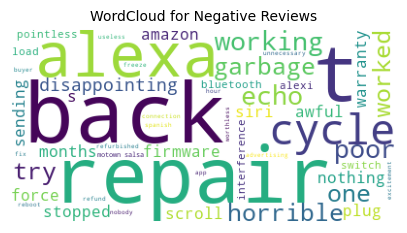

In [139]:
wc = WordCloud(background_color="white", max_words = 50)

plt.figure(figsize=(5,5))
plt.imshow(wc.generate(unique_neg))
plt.title("WordCloud for Negative Reviews", fontsize=10)
plt.axis("off")
plt.show()

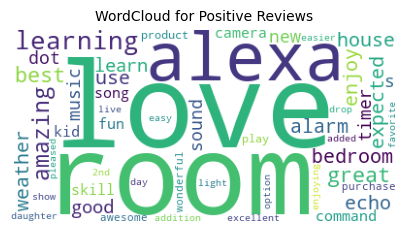

In [136]:
wc = WordCloud(background_color="white", max_words = 50)

plt.figure(figsize=(5,5))
plt.imshow(wc.generate(unique_pos))
plt.title("WordCloud for Positive Reviews", fontsize=10)
plt.axis("off")
plt.show()

NLP

In [143]:
corpus = []
stemmer = porter.PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [147]:
cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [149]:
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [151]:
print(f"X : {x.shape}" )
print(f"Y : {y.shape}" )

X : (3149, 2500)
Y : (3149,)


In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

In [157]:
print(X_train)
print(Y_train)
print("__________")
print(X_test)
print(Y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 1 1 ... 1 1 1]
__________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1

In [158]:
print(X_train.max())

12


In [159]:
print(X_test.max())

8


In [163]:
scaler = MinMaxScaler()
x_train_sc1 = scaler.fit_transform(X_train)
x_test_sc1 = scaler.transform(X_test)

In [164]:
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [167]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_sc1, Y_train)

RandomForestClassifier()

In [168]:
print(model_rf.score(x_train_sc1, Y_train))
print(model_rf.score(x_test_sc1, Y_test))

0.9927404718693285
0.9238095238095239


In [169]:
y_pred = model_rf.predict(x_test_sc1)

In [170]:
cm = confusion_matrix(Y_test, y_pred)

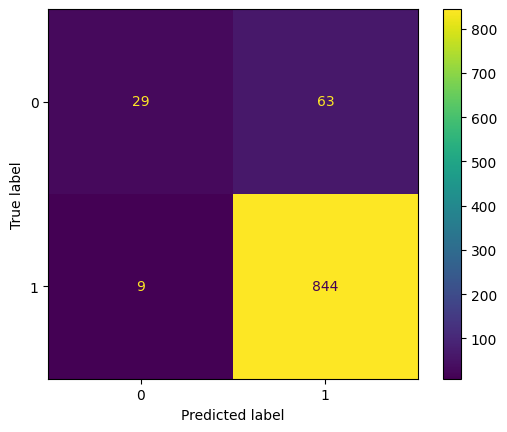

In [171]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [173]:
accuracies = cross_val_score(estimator = model_rf, X = x_train_sc1, y = Y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9382949403537639
Standard Variance : 0.008412852150137495


In [174]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [175]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(x_train_sc1, Y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [176]:
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [178]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(Y_test, y_pred))

Cross validation mean accuracy on train set : 96.81261343012704
Cross validation mean accuracy on test set : 93.02971869328493
Accuracy score for test set : 0.9238095238095239


In [180]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train_sc1, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [181]:
print("Training Accuracy :", model_xgb.score(x_train_sc1, Y_train))
print("Testing Accuracy :", model_xgb.score(x_test_sc1, Y_test))

Training Accuracy : 0.9750453720508166
Testing Accuracy : 0.9206349206349206


In [182]:
y_preds = model_xgb.predict(X_test)

In [184]:
cm = confusion_matrix(Y_test, y_preds)
print(cm)

[[ 27  65]
 [ 12 841]]


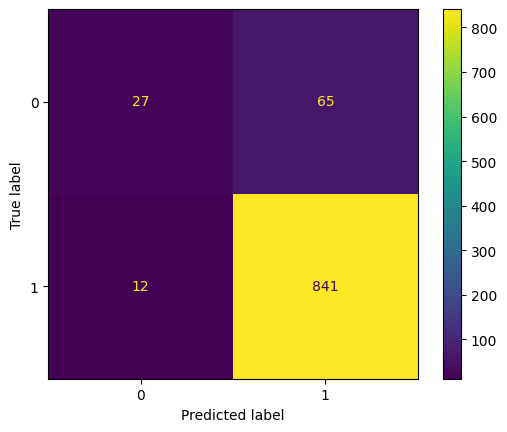

In [185]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [186]:
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [187]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_sc1, Y_train)

DecisionTreeClassifier()

In [189]:
print("Training Accuracy :", model_dt.score(x_train_sc1, Y_train))
print("Testing Accuracy :", model_dt.score(x_test_sc1, Y_test))

Training Accuracy : 0.9927404718693285
Testing Accuracy : 0.9216931216931217


In [190]:
y_preds = model_dt.predict(X_test)

In [192]:
cm = confusion_matrix(Y_test, y_preds)
print(cm)

[[ 46  46]
 [ 64 789]]


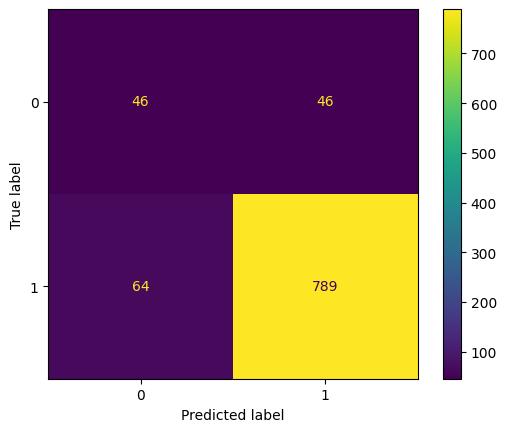

In [193]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [ ]:
!